In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cluster
import acquire
import prepare
import summarize

In [7]:
df = acquire.wrangle_zillow()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73087 entries, 0 to 73423
Data columns (total 33 columns):
id                        73087 non-null int64
parcel_id                 73087 non-null int64
ac_type_id                73087 non-null float64
bathroom_cnt              73087 non-null float64
bedroom_cnt               73087 non-null float64
sum_bath_and_bed          73087 non-null float64
square_feet               73087 non-null float64
fips_code                 73087 non-null float64
full_bath_cnt             73087 non-null float64
heating_type_id           73087 non-null float64
latitude                  73087 non-null float64
longitude                 73087 non-null float64
lot_sqr_ft                73087 non-null float64
property_land_use_code    73087 non-null object
property_land_use_id      73087 non-null float64
zipcode_id                73087 non-null float64
room_cnt                  73087 non-null float64
building_value            73087 non-null float64
total_value   

    Getting rid of some ID columns, and the date one. LAT-LONG stays because the split_data function cuts it off.

In [9]:
df = df.drop(['transaction_date','property_land_use_code', 'id', 'parcel_id'], axis=1)

In [ ]:
train, test = cluster.split_data(df)

In [ ]:
train.shape

In [ ]:
train.info()

# FOR THE MOMENT. NO TEST TRAIN SPLIT FOR MAKING CLUSTERS. THATS FOR LATER

In [10]:
df_standard, df2, std_object = cluster.standardize_train_test(df, df)

In [11]:
df_standard.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73087 entries, 0 to 73423
Data columns (total 29 columns):
ac_type_id              73087 non-null float64
bathroom_cnt            73087 non-null float64
bedroom_cnt             73087 non-null float64
sum_bath_and_bed        73087 non-null float64
square_feet             73087 non-null float64
fips_code               73087 non-null float64
full_bath_cnt           73087 non-null float64
heating_type_id         73087 non-null float64
latitude                73087 non-null float64
longitude               73087 non-null float64
lot_sqr_ft              73087 non-null float64
property_land_use_id    73087 non-null float64
zipcode_id              73087 non-null float64
room_cnt                73087 non-null float64
building_value          73087 non-null float64
total_value             73087 non-null float64
land_value              73087 non-null float64
tax_amount              73087 non-null float64
census_block            73087 non-null float6

## Remove some outliers, maybe

In [ ]:
prepare.remove_upper_outliers(df_standard., df_standard)

## It might be helpful

In [12]:
cluster.list_inertia_scores(df_standard)

1 : 4.423657062805574
2 : 4.092795324549424
3 : 3.878918913496004
4 : 3.725267292276577
5 : 3.504315101889184
6 : 3.3736419610389135
7 : 3.3698809402615764
8 : 3.227319610451943
9 : 3.257074727889613


In [13]:
three_cluster_df = cluster.make_clusters(df_standard, n_clusters=3)

In [14]:
three_cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73087 entries, 0 to 73423
Data columns (total 30 columns):
ac_type_id              73087 non-null float64
bathroom_cnt            73087 non-null float64
bedroom_cnt             73087 non-null float64
sum_bath_and_bed        73087 non-null float64
square_feet             73087 non-null float64
fips_code               73087 non-null float64
full_bath_cnt           73087 non-null float64
heating_type_id         73087 non-null float64
latitude                73087 non-null float64
longitude               73087 non-null float64
lot_sqr_ft              73087 non-null float64
property_land_use_id    73087 non-null float64
zipcode_id              73087 non-null float64
room_cnt                73087 non-null float64
building_value          73087 non-null float64
total_value             73087 non-null float64
land_value              73087 non-null float64
tax_amount              73087 non-null float64
census_block            73087 non-null float6

In [22]:
three_cluster_df['cluster_labels'].value_counts()

0    51381
1    14813
2     6893
Name: cluster_labels, dtype: int64

In [23]:
three_cluster_df.groupby('cluster_labels').total_value.mean()

cluster_labels
0   -0.204384
1   -0.092083
2    1.721379
Name: total_value, dtype: float64

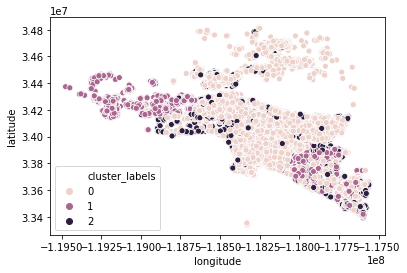

In [24]:
cluster.show_clusters_on_map(three_cluster_df)

In [25]:
cluster_labels = three_cluster_df.cluster_labels

In [26]:
three_cluster_df.drop('cluster_labels',axis=1,inplace=True)

In [27]:
scaler, unscaled_df = cluster.my_inv_transform(std_object, three_cluster_df)

In [30]:
unscaled_df.head()

,ac_type_id,bathroom_cnt,bedroom_cnt,sum_bath_and_bed,square_feet,fips_code,full_bath_cnt,heating_type_id,latitude,longitude,...,has_basement,has_fireplace,has_deck,has_garage,has_pool_or_spa,has_yardbuilding,multistory,home_age,abs_logerror,cluser_labels
0,1.0,3.5,4.0,3.5,3100.0,6059.0,3.0,2.0,7.543863e+11,-3.578505e+12,...,0.0,0.0,0.0,1.000000e+00,0.0,0.0,0.0,18.0,0.025595,2
1,1.0,1.0,2.0,1.0,1465.0,6111.0,1.0,2.0,7.726507e+11,-3.621382e+12,...,0.0,1.0,0.0,-2.775558e-17,0.0,0.0,0.0,49.0,0.055619,1
2,1.0,2.0,3.0,2.0,1243.0,6059.0,2.0,2.0,7.600212e+11,-3.577107e+12,...,0.0,0.0,0.0,1.000000e+00,1.0,0.0,0.0,54.0,0.005383,1
3,1.0,3.0,4.0,3.0,2376.0,6037.0,3.0,2.0,7.680734e+11,-3.589784e+12,...,0.0,0.0,0.0,-2.775558e-17,1.0,0.0,0.0,46.0,0.103410,0
4,1.0,3.0,3.0,3.0,1312.0,6037.0,3.0,2.0,7.667263e+11,-3.595064e+12,...,0.0,0.0,0.0,-2.775558e-17,1.0,0.0,0.0,52.0,0.006940,0


In [31]:
unscaled_df['cluster_labels'] = cluster_labels

In [32]:
unscaled_df.groupby('cluster_labels').mean()

,ac_type_id,bathroom_cnt,bedroom_cnt,sum_bath_and_bed,square_feet,fips_code,full_bath_cnt,heating_type_id,latitude,longitude,...,has_basement,has_fireplace,has_deck,has_garage,has_pool_or_spa,has_yardbuilding,multistory,home_age,abs_logerror,cluser_labels
cluster_labels,,,,,,,,,,,,,,,,,,,,,
0,1.007279,2.048666,2.760884,2.048666,1482.954906,6041.066172,2.011230,3.680310,7.634533e+11,-3.587887e+12,...,0.000000,0.000311,0.000000,0.046379,0.185224,0.000000,0.007454,48.448687,0.064616,0
1,2.292378,2.293931,3.376764,2.293931,1850.601026,6079.025113,2.134409,2.154661,7.610570e+11,-3.591478e+12,...,0.003105,0.537433,0.038547,0.875920,0.224195,0.155472,0.429488,44.358874,0.060369,1
2,1.067315,4.073480,4.267373,4.073480,3650.125054,6045.489772,3.960975,2.183665,7.615368e+11,-3.587697e+12,...,0.000580,0.035253,0.004642,0.338749,0.516901,0.008269,0.032497,33.474249,0.092358,2


In [33]:
unscaled_df.abs_logerror.mean()

0.06637176795414802

In [34]:
unscaled_df.logerror.mean()

0.01654286947054684

In [35]:
unscaled_df.groupby('cluster_labels').logerror.mean()

cluster_labels
0    0.012889
1    0.020409
2    0.035470
Name: logerror, dtype: float64